K-means clustering is an algorithm to divide observations to several clusters. Each cluster has a centroid and all the observations belonging to the cluster is closer to its cluster's centroid than other clusters' centers. 

K-means clustering works as follows.

1. choose random initial centroid for each cluster
2. assign each observation to the nearst center
3. calculate new centroids
4. if the assignment no longer changes, it's done. Otherwise, go back to 2

Let's impletement the algorithm.

In [10]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

Let's generate observations with `make_classification` in `sklearn` package.

In [27]:
dat = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                          n_classes=3, class_sep=2, n_clusters_per_class=1, random_state=0)

Let's visualize the data.

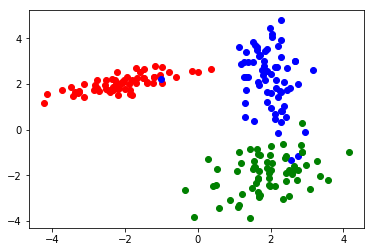

In [28]:
X = dat[0]
y = dat[1]
plt.plot(X[y==0,0], X[y==0,1], 'ro')
plt.plot(X[y==1,0], X[y==1,1], 'bo')
plt.plot(X[y==2,0], X[y==2,1], 'go')

Next, let's generate initial centroids.

In [134]:
n_classes = 3

# centroids shouldn't be too far from observations
mx = np.apply_along_axis(lambda x: max(x), 0, X)
mn = np.apply_along_axis(lambda x: min(x), 0, X)
rnd = np.random.rand(n_classes)
centroids = (mx - mn) * rnd.reshape(-1,1) + mn

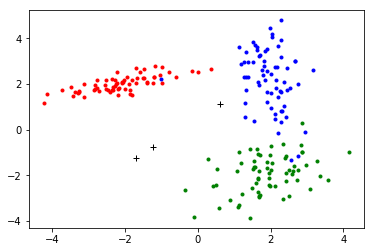

In [131]:
plt.plot(X[y==0,0], X[y==0,1], 'r.')
plt.plot(X[y==1,0], X[y==1,1], 'b.')
plt.plot(X[y==2,0], X[y==2,1], 'g.')
plt.plot(centroids[:,0], centroids[:,1], 'k+')

The + symbols represent the centroids. They are not too far from observations.

Next, let's calculate the final centroids.

In [132]:
def distances_from_point(X, p):
    # square of euclidian distance
    return np.apply_along_axis(lambda x: sum((x-p)*(x-p)), 1, X)

centroid_list = []
next_centroids = np.zeros_like(centroids)
class_ = np.zeros_like(y)

while True:
    # save centroid coordinates for later visualization
    centroid_list.append(centroids)
    # distances of each data point from each centroid
    dists = np.apply_along_axis(lambda p: distances_from_point(X, p), 1, centroids)
    # the class each data point belongs to
    class_ = np.apply_along_axis(lambda x: np.argmin(x), 0, dists)
    # update centroids
    next_centroids = np.array([np.average(X[class_==i], axis=0) for i in range(n_classes)])
    # if the centroids don't change, break
    if np.all(next_centroids == centroids): break
    centroids = next_centroids

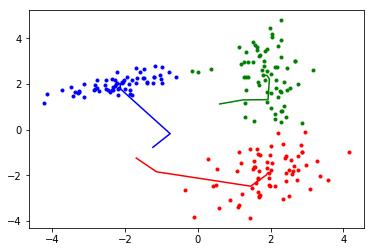

In [133]:
plt.plot(X[class_==0,0], X[class_==0,1], 'k.')
plt.plot(X[class_==1,0], X[class_==1,1], 'k.')
plt.plot(X[class_==2,0], X[class_==2,1], 'k.')

cent0 = np.array([c[0] for c in centroid_list])
cent1 = np.array([c[1] for c in centroid_list])
cent2 = np.array([c[2] for c in centroid_list])

plt.plot(cent0[:,0], cent0[:,1], 'r-')
plt.plot(cent1[:,0], cent1[:,1], 'b-')
plt.plot(cent2[:,0], cent2[:,1], 'g-')

The blue, green and red lines show how the centroids shifted for each iteration. The convergence of the centroids was confirmed.

Let's make it into a class.

In [161]:
class KMeanClustering:
    def __init__(self, n_classes, max_iter=10000):
        self.n_classes = n_classes
        self.max_iter = max_iter
    
    def __get_random_centroids(self, X):
        # centroids shouldn't be too far from observations
        mx = np.apply_along_axis(lambda x: max(x), 0, X)
        mn = np.apply_along_axis(lambda x: min(x), 0, X)
        rnd = np.random.rand(self.n_classes)
        return (mx - mn) * rnd.reshape(-1,1) + mn        

    def __distances_from_point(self, X, p):
        # square of euclidian distance
        return np.apply_along_axis(lambda x: sum((x-p)*(x-p)), 1, X)    
    
    def fit(self, X, y):
        centroids = self.__get_random_centroids(X)
        self.centroid_history = []
        next_centroids = np.zeros_like(centroids)
        self.class_history = []
        n_iter = 0

        # if the iteration reaches max iter, stop
        while True and n_iter < self.max_iter:
            # save centroid coordinates
            self.centroid_history.append(centroids)
            # distances of each data point from each centroid
            dists = np.apply_along_axis(lambda p: self.__distances_from_point(X, p), 1, centroids)
            # the class each data point belongs to
            class_ = np.apply_along_axis(lambda x: np.argmin(x), 0, dists)
            # save class 
            self.class_history.append(class_)
            # update centroids
            next_centroids = np.array([np.average(X[class_==i], axis=0) for i in range(self.n_classes)])
            # if the centroids don't change, break
            if np.all(next_centroids == centroids): break
            centroids = next_centroids
            n_iter += 1
            
        self.centroids = centroids
        self.class_ = self.class_history[-1]

Check the performance

In [147]:
kmeans = KMeanClustering(3)
kmeans.fit(X,y)

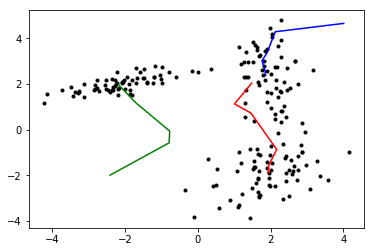

In [152]:
plt.plot(X[class_==0,0], X[class_==0,1], 'k.')
plt.plot(X[class_==1,0], X[class_==1,1], 'k.')
plt.plot(X[class_==2,0], X[class_==2,1], 'k.')

cent0 = np.array([c[0] for c in kmeans.centroid_history])
cent1 = np.array([c[1] for c in kmeans.centroid_history])
cent2 = np.array([c[2] for c in kmeans.centroid_history])

plt.plot(cent0[:,0], cent0[:,1], 'r-')
plt.plot(cent1[:,0], cent1[:,1], 'b-')
plt.plot(cent2[:,0], cent2[:,1], 'g-')

It seems good.